In [1]:
from scipy import stats as ss

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.ion()

In [2]:
df = pd.read_csv('data/nba_salaries.csv')
df = df[df['TEAM'].isin(['Houston Rockets', 'Cleveland Cavaliers'])]

In [3]:
df

,PLAYER,POSITION,TEAM,SALARY
72,LeBron James,SF,Cleveland Cavaliers,22.970500
73,Kevin Love,PF,Cleveland Cavaliers,19.689000
74,Kyrie Irving,PG,Cleveland Cavaliers,16.407501
75,Tristan Thompson,C,Cleveland Cavaliers,14.260870
76,Brendan Haywood,C,Cleveland Cavaliers,10.522500
77,Iman Shumpert,SG,Cleveland Cavaliers,8.988765
78,Timofey Mozgov,C,Cleveland Cavaliers,4.950000
79,Mo Williams,PG,Cleveland Cavaliers,2.100000
80,Sasha Kaun,C,Cleveland Cavaliers,1.276000
81,Matthew Dellavedova,PG,Cleveland Cavaliers,1.147276


In [4]:
filtro = df['TEAM'] == 'Houston Rockets'
df[filtro]['SALARY'].mean()

7.107153083333334

In [5]:
df[~filtro]['SALARY'].mean()

10.2312412

In [6]:
diff_real = df[~filtro]['SALARY'].mean() - df[filtro]['SALARY'].mean()
diff_real

3.124088116666665

In [7]:
filtro

72     False
73     False
74     False
75     False
76     False
77     False
78     False
79     False
80     False
81     False
131     True
132     True
133     True
134     True
135     True
136     True
137     True
138     True
139     True
140     True
141     True
142     True
Name: TEAM, dtype: bool

In [8]:
np.random.shuffle(filtro.values)
filtro

72      True
73      True
74      True
75     False
76      True
77      True
78      True
79      True
80     False
81      True
131    False
132    False
133    False
134     True
135     True
136    False
137    False
138     True
139    False
140    False
141    False
142     True
Name: TEAM, dtype: bool

In [9]:
N = 10000
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = df[~filtro]['SALARY'].mean() - df[filtro]['SALARY'].mean()
    diferencas[i] = diff

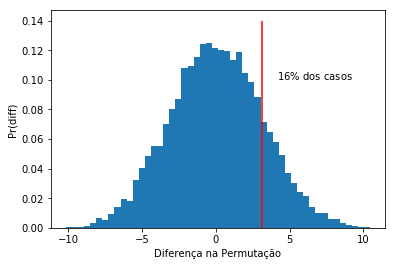

In [10]:
plt.hist(diferencas, bins=50, normed=True)
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.vlines(diff_real, 0, 0.14, color='red')
plt.text(diff_real+1, 0.10, '$16\%$ dos casos')
plt.show()

In [11]:
(diferencas > diff_real).sum() / N

0.16220000000000001

In [12]:
diff_real

3.124088116666665

## 2 Animacao

In [13]:
from IPython.display import HTML
from matplotlib import animation

In [14]:
def update_hist(num, data):
    plt.cla()
    plt.hist(data[0:100 * (num+1)], bins=50, normed=True)
    plt.xlabel('Diferença na Permutação')
    plt.ylabel('Pr(diff)')

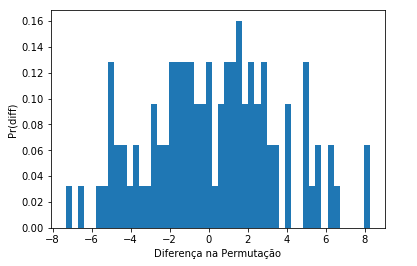

In [15]:
fig = plt.figure()
ani = animation.FuncAnimation(fig, update_hist, 30, fargs=(diferencas, ))
HTML(ani.to_html5_video())